In [15]:
import pandas as pd
import gensim
import time
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
with open('Data/Lemmatized/Germany_lemmatized.txt') as file:
    lines = file.readlines()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Tokenize

In [17]:
corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Insert Bigram model
bigram = Phrases(corpus, min_count=5, threshold=25, connector_words=ENGLISH_CONNECTOR_WORDS)
bigram_mod = gensim.models.phrases.Phraser(bigram)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
corpus_with_bigram = [bigram_mod[doc] for doc in corpus]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
corpus_with_bigram[50]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['overlook',
 'berlin',
 'glass_dome',
 'reichstag',
 'must',
 'see',
 'visiting',
 'berlin',
 'plan_ahead',
 'book',
 'ticket_online',
 'plan',
 'wait',
 'long',
 'line',
 'get',
 'ticket',
 'modern',
 'glass_dome',
 'classic',
 'building',
 'incredible',
 'beautiful',
 'inside',
 'outside',
 'dome',
 'see',
 'view',
 'berlin',
 'building',
 'house',
 'german',
 'parliament',
 'learn',
 'history',
 'photograph',
 'inside',
 'dome']

In [8]:
corpus = pd.DataFrame({'reviews': corpus})

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


reviews
0  [great, place, visit, great, visit, historical...
1  [history, nerd, stop, political, center, germa...
2  [famous, reichstag, admired, outside, gave, u,...
3  [must, tour, berlin, building, importance, muc...
4  [plan, ahead, found, place, berlin, advance, r...

In [9]:
docs = corpus['reviews']

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Bag of words

In [10]:
dictionary = gensim.corpora.Dictionary(docs)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


28633


In [12]:
bow = [dictionary.doc2bow(doc) for doc in docs]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## TF-IDF

In [13]:
from gensim.models.coherencemodel import CoherenceModel

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
tfidf = gensim.models.TfidfModel(bow)
tfidf = tfidf[bow]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
country = "Germany"
no_iterations = 100
file_name = "Data/Result/" + country + "_"+str(no_iterations) +"_result.csv"
file_write = open(file_name, "a")

for no_topics in range(40,101):

    start = time.time()
    lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                             num_topics=no_topics, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= no_iterations)
    end = time.time()
    print("Number of topics: " + str(no_topics))
    print("Processing time: %fs" % (end - start))
    cm = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
    coherence = cm.get_coherence() 
    file_write.write(str(no_topics) + "," + str(coherence) +","+str(end-start)+"\n")
    print("Topics coherence: " + str(coherence))
    
file_write.close()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics: 40
Processing time: 30.558388s
Topics coherence: -11.352204853733713
Number of topics: 41
Processing time: 29.471413s
Topics coherence: -10.571258356503856
Number of topics: 42
Processing time: 29.846334s
Topics coherence: -11.670650633577196
Number of topics: 43
Processing time: 30.599882s
Topics coherence: -11.304952722517429
Number of topics: 44
Processing time: 30.017099s
Topics coherence: -10.44825024894018
Number of topics: 45
Processing time: 29.860677s
Topics coherence: -10.44497683886873
Number of topics: 46
Processing time: 30.121373s
Topics coherence: -10.645186636232063
Number of topics: 47
Processing time: 30.718860s
Topics coherence: -10.566962309838859
Number of topics: 48
Processing time: 29.822988s
Topics coherence: -11.187985602853805
Number of topics: 49
Processing time: 30.458230s
Topics coherence: -10.50277187985968
Number of topics: 50
Processing time: 33.168908s
Topics coherence: -10.514890574604376
Number of topics: 51
Processing time: 36.89412

In [17]:
start = time.time()
lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                             num_topics=73, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= 50)
end = time.time()
print("Number of topics: " + str(73))
print("Processing time: %fs" % (end - start))
cm = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
coherence = cm.get_coherence() 
print("Topics coherence: " + str(coherence))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics: 73
Processing time: 32.016559s
Topics coherence: -5.874275738050561


In [43]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.084*"climb" + 0.074*"stair" + 0.058*"dom" + 0.034*"breath" + 0.029*"shape" + 0.023*"hundr" + 0.014*"commit" + 0.011*"requir" + 0.006*"narrow" + 0.005*"strictli"


Topic: 1 Word: 0.054*"upstair" + 0.031*"tuck" + 0.025*"curv" + 0.007*"mint" + 0.005*"rack" + 0.000*"saw" + 0.000*"away" + 0.000*"gt" + 0.000*"interest" + 0.000*"supercar"


Topic: 2 Word: 0.078*"typic" + 0.046*"oldest" + 0.046*"masterpiec" + 0.039*"intern" + 0.038*"sculptur" + 0.036*"paint" + 0.032*"impos" + 0.031*"known" + 0.023*"current" + 0.019*"enorm"


Topic: 3 Word: 0.357*"opera" + 0.031*"condit" + 0.030*"otherwis" + 0.024*"someon" + 0.023*"standard" + 0.023*"madonna" + 0.019*"fairli" + 0.011*"hat" + 0.010*"regularli" + 0.009*"jan"


Topic: 4 Word: 0.070*"climat" + 0.061*"ww" + 0.047*"daughter" + 0.032*"ive" + 0.020*"usa" + 0.011*"accur" + 0.008*"yo" + 0.006*"messag" + 0.005*"recogn" + 0.001*"fantast"


Topic: 5 Word: 0.102*"nearbi" + 0.051*"join" + 0.044*"card" + 0.032*"cash" + 0.028*"driver" + 0.027*"

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
pyLDAvis.gensim_models.prepare(lda_model_tfidf, tfidf, dictionary)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
9      0.394162+0.000000j  0.064358+0.000000j       1        1  10.058264
6      0.356993+0.000000j -0.035704+0.000000j       2        1   5.832525
36     0.343092+0.000000j  0.001253+0.000000j       3        1   4.899686
33     0.348365+0.000000j  0.012770+0.000000j       4        1   4.525271
13     0.335813+0.000000j  0.012821+0.000000j       5        1   4.379497
...                   ...                 ...     ...      ...        ...
48    -0.144145+0.000000j  0.003613+0.000000j      69        1   0.313487
61    -0.144145+0.000000j  0.003613+0.000000j      70        1   0.313487
56    -0.144145+0.000000j  0.003613+0.000000j      71        1   0.313487
19    -0.144145+0.000000j  0.003613+0.000000j      72        1   0.313487
60    -0.144145+0.000000j  0.003613+0.000000j      73        1   0.313487

[73 ro

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


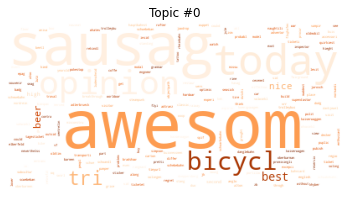

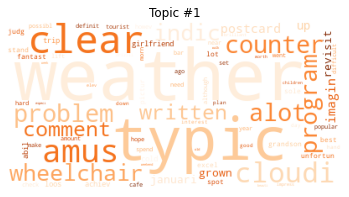

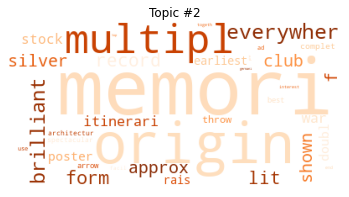

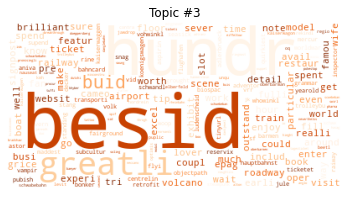

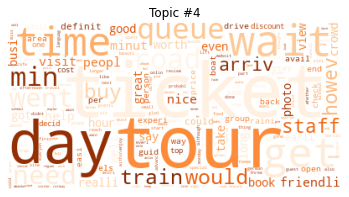

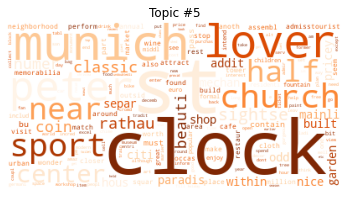

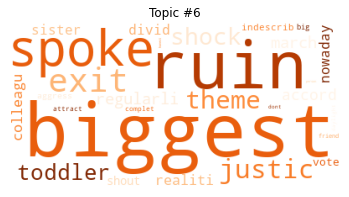

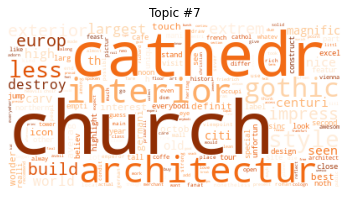

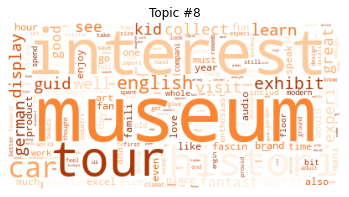

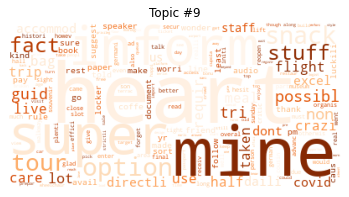

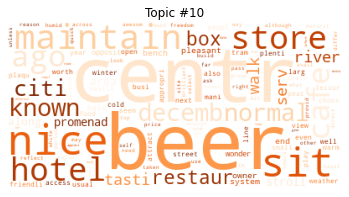

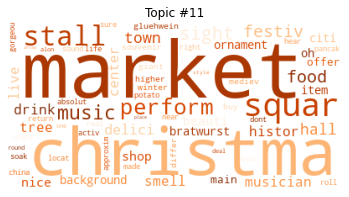

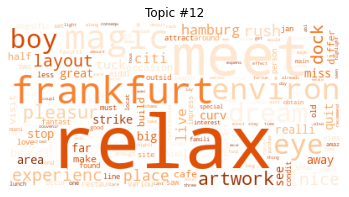

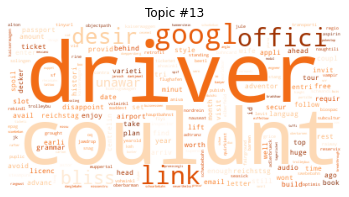

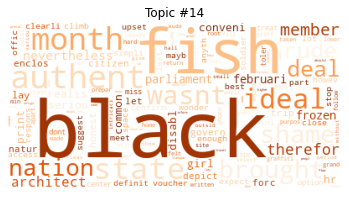

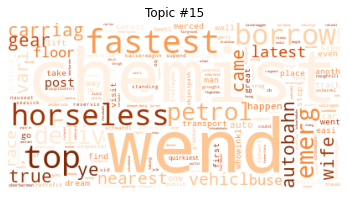

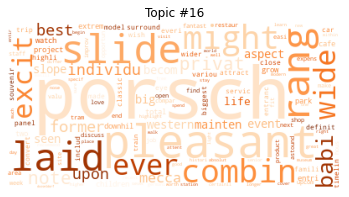

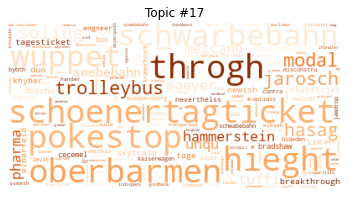

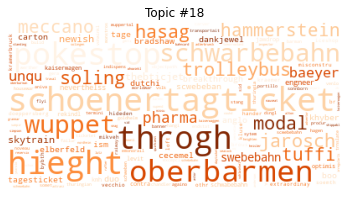

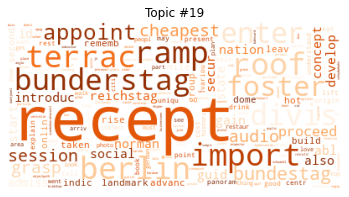

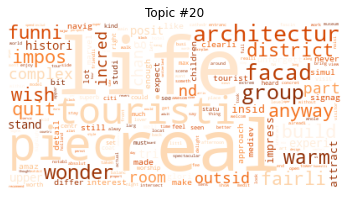

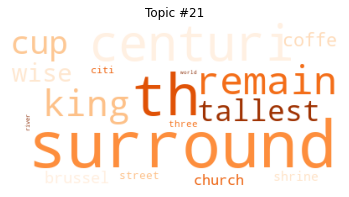

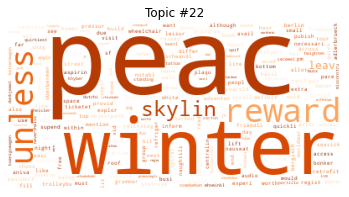

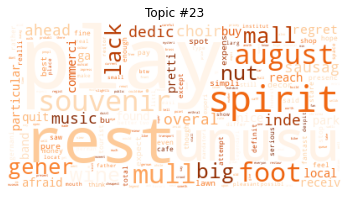

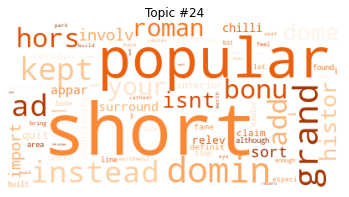

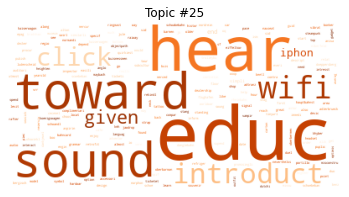

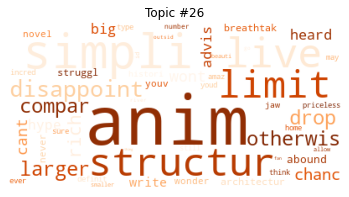

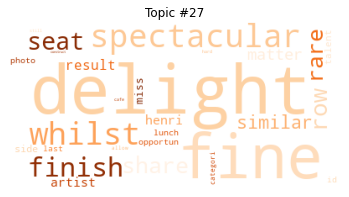

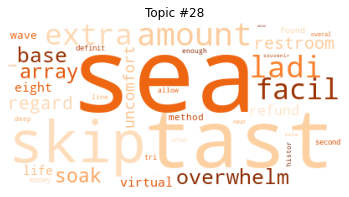

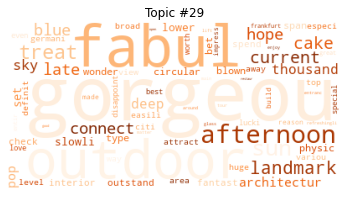

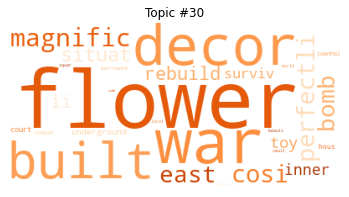

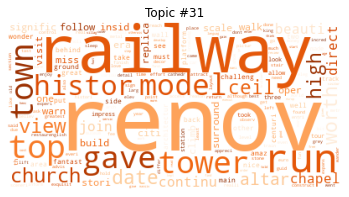

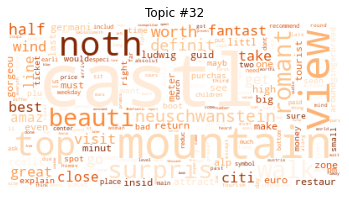

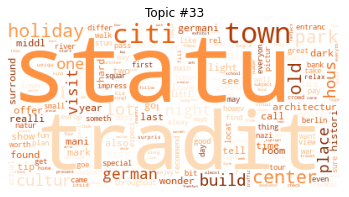

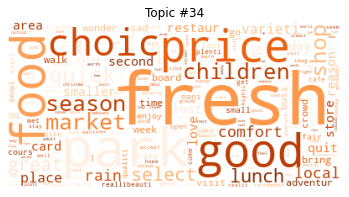

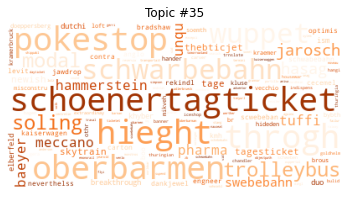

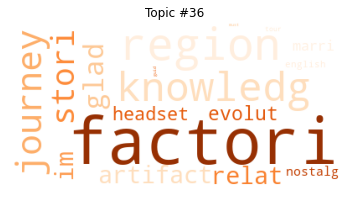

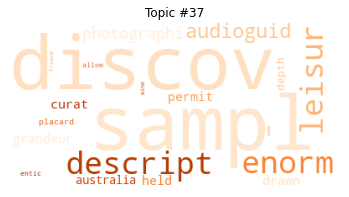

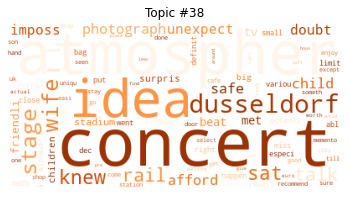

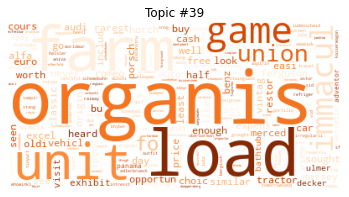

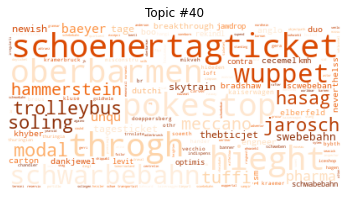

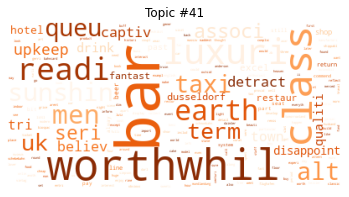

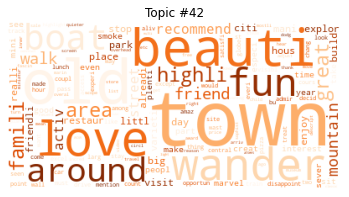

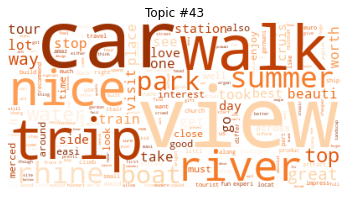

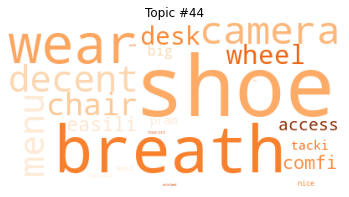

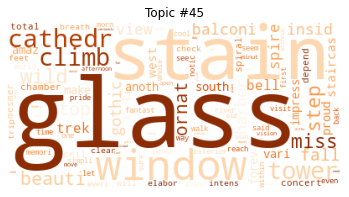

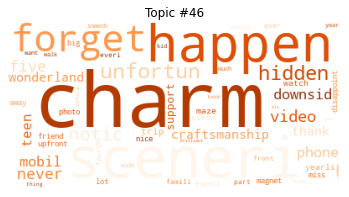

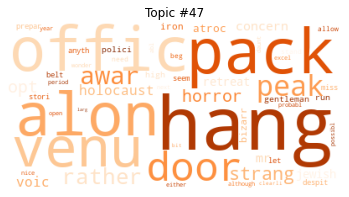

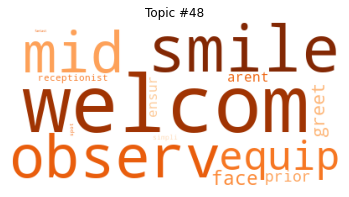

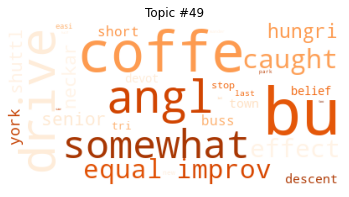

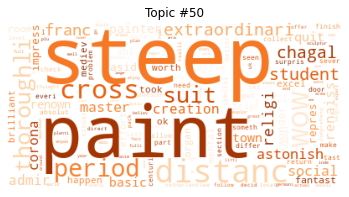

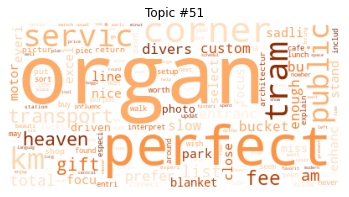

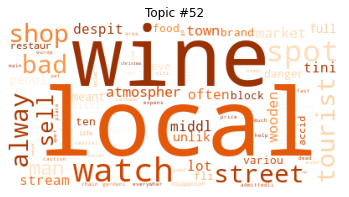

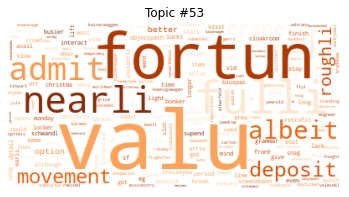

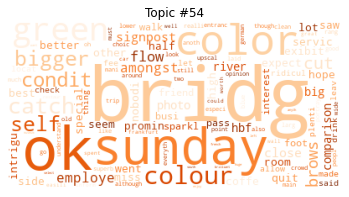

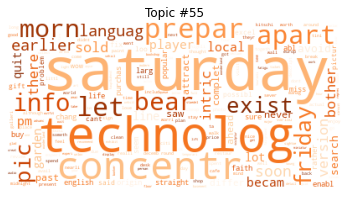

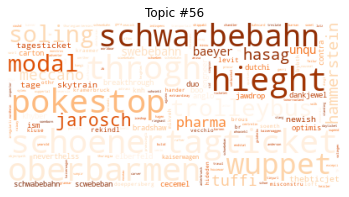

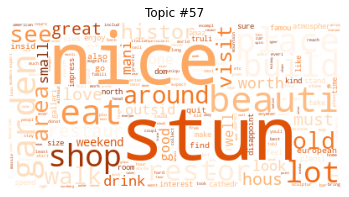

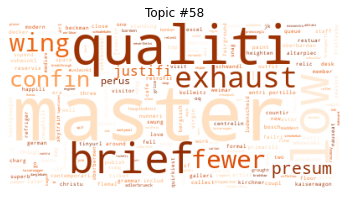

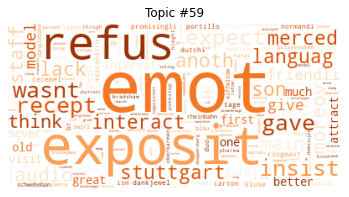

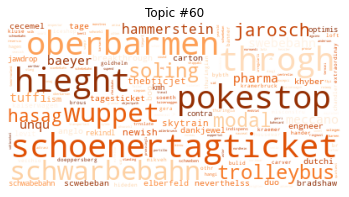

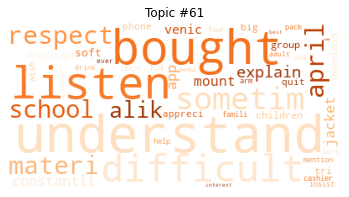

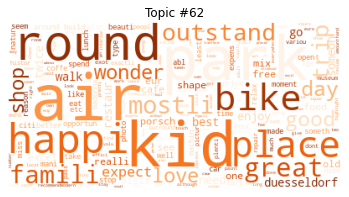

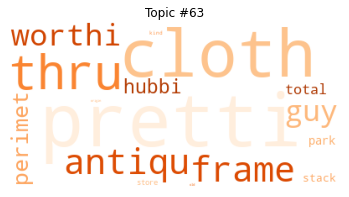

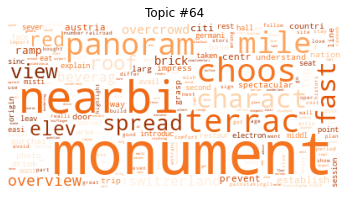

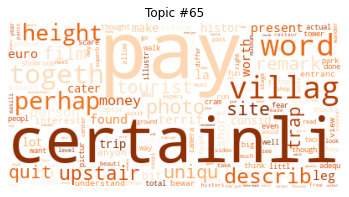

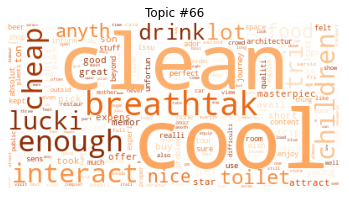

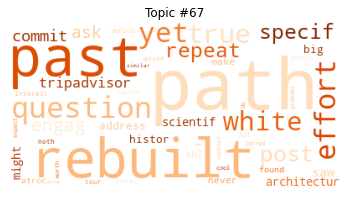

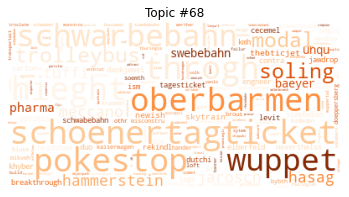

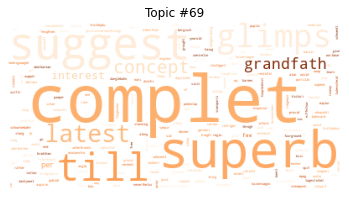

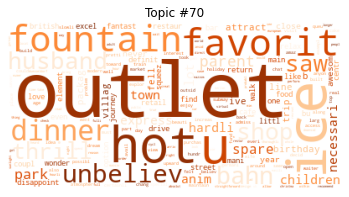

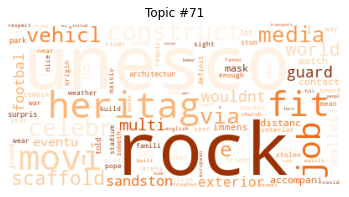

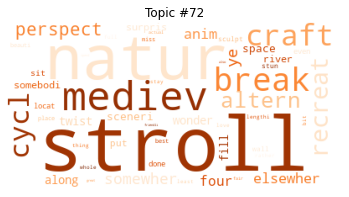

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model_tfidf.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [19]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
cm = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
coherence

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-5.874275738050561

In [22]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.corpora import WikiCorpus, MmCorpus
from gensim.models.coherencemodel import CoherenceModel
path_to_wiki_dump = datapath("enwiki-latest-pages-articles1.xml-p000000010p000030302-shortened.bz2")
corpus_path = get_tmpfile("wiki-corpus.mm")
wiki = WikiCorpus(path_to_wiki_dump)  # create word->word_id mapping, ~8h on full wiki
MmCorpus.serialize(corpus_path, wiki)  # another 8h, creates a file in MatrixMarket format and mapping

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/gensim/utils.py:1332: UserWarning: detected OSX with python3.8+; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)


In [25]:
cm = CoherenceModel(model=lda_model_tfidf, texts=wiki ,coherence='c_uci')
coherence = cm.get_coherence()  # get coherence value

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)


In [26]:
coherence

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nan